<a href="https://colab.research.google.com/github/sajosam/deep_learning/blob/main/ANN_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificial Neural Network

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
tf.__version__

'2.6.0'

## Part 1 - Data Preprocessing

### Importing the dataset

In [3]:
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

In [4]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [5]:
print(y)

[1 0 1 ... 1 1 0]


### Encoding categorical data

Label Encoding the "Gender" column

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [7]:
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


One Hot Encoding the "Geography" column

In [8]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [9]:
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


In [10]:
X.shape

(10000, 12)

### Splitting the dataset into the Training set and Test set

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Feature Scaling

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
from tensorflow.keras.layers import Dense , InputLayer , Dropout

In [14]:
X_train.shape

(8000, 12)

## Part 2 - Building the ANN

### Initializing the ANN

In [15]:
model = tf.keras.models.Sequential()

In [16]:
model.add(tf.keras.layers.Dense(units=60,input_shape=(12,),activation='relu'))

In [17]:
model.add(Dropout(rate=0.2))

In [18]:
model.add(tf.keras.layers.Dense(units=40, activation='relu'))

In [19]:
model.add(Dropout(rate=0.2))

In [20]:
model.add(tf.keras.layers.Dense(units=20, activation='relu'))
model.add(Dropout(rate=0.2))

In [21]:
model.add(Dropout(rate=0.2))
model.add(tf.keras.layers.Dense(units=10, activation='relu'))
model.add(Dropout(rate=0.2))

In [22]:
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the ANN

### Compiling the ANN

In [23]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [24]:
# from tensorflow import keras
# opt = keras.optimizers.Adadelta(learning_rate=0.01)
# model.compile(loss='binary_crossentropy', optimizer=opt)

### Training the ANN on the Training set

In [25]:
modell=model.fit(X_train,y_train,batch_size=42,epochs = 200)

Epoch 1/200
191/191 [==============================] - 1s 3ms/step - loss: 0.5813 - accuracy: 0.7175
Epoch 2/200
191/191 [==============================] - 0s 3ms/step - loss: 0.4657 - accuracy: 0.7986
Epoch 3/200
191/191 [==============================] - 0s 3ms/step - loss: 0.4484 - accuracy: 0.8055
Epoch 4/200
191/191 [==============================] - 0s 3ms/step - loss: 0.4319 - accuracy: 0.8140
Epoch 5/200
191/191 [==============================] - 0s 2ms/step - loss: 0.4141 - accuracy: 0.8264
Epoch 6/200
191/191 [==============================] - 0s 2ms/step - loss: 0.3965 - accuracy: 0.8363
Epoch 7/200
191/191 [==============================] - 0s 2ms/step - loss: 0.3896 - accuracy: 0.8376
Epoch 8/200
191/191 [==============================] - 0s 2ms/step - loss: 0.3806 - accuracy: 0.8425
Epoch 9/200
191/191 [==============================] - 0s 3ms/step - loss: 0.3797 - accuracy: 0.8480
Epoch 10/200
191/191 [==============================] - 0s 2ms/step - loss: 0.3815 - accura

In [26]:
pd.DataFrame(modell.history)

,loss,accuracy
0,0.581272,0.717500
1,0.465672,0.798625
2,0.448373,0.805500
3,0.431893,0.814000
4,0.414076,0.826375
...,...,...
195,0.302232,0.874375
196,0.297995,0.877500
197,0.300049,0.877625
198,0.301280,0.873125


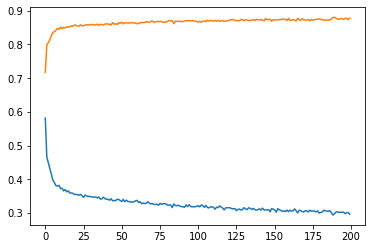

In [27]:
plt.plot(pd.DataFrame(modell.history))

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 60)                780       
_________________________________________________________________
dropout (Dropout)            (None, 60)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 40)                2440      
_________________________________________________________________
dropout_1 (Dropout)          (None, 40)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                820       
_________________________________________________________________
dropout_2 (Dropout)          (None, 20)                0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 20)                0

In [29]:
!pip3 install ann_visualizer
from ann_visualizer.visualize import ann_viz
ann_viz(model, title = "ANN")

In [30]:
model.evaluate(X_train,y_train)

250/250 [==============================] - 1s 2ms/step - loss: 0.2548 - accuracy: 0.8926


[0.254772424697876, 0.8926249742507935]

In [31]:
model.evaluate(X_test,y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.3610 - accuracy: 0.8610


[0.36099934577941895, 0.8610000014305115]

### Predicting the Test set results

In [32]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


### Making the Confusion Matrix

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1513   82]
 [ 196  209]]


0.861